<a href="https://colab.research.google.com/github/ghada-alhilo/Pancreas_Segmentation/blob/main/Pancreas_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pancreas Segmentation 2023

# 1. Load google drive folder

In [ ]:
import os
import time
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# add shortcut link here from your google drive

os.chdir('/content/drive/MyDrive/Pancreas_Seg2023') # Ghada
#os.chdir('/content/drive/MyDrive/Projects Colab/Pancreas_Seg2023')

!pwd

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1-SbrXU-1L5AZut2iKeyNRL8XZ1kNqzbZ/Pancreas_Seg2023


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download NIH82 dataset

In [ ]:
!kaggle datasets download -d tahsin/pancreasct-dataset
!unzip ./pancreasct-dataset.zip -d ./pancreasctKagl

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open ./pancreasct-dataset.zip, ./pancreasct-dataset.zip.zip or ./pancreasct-dataset.zip.ZIP.


# Install libs

In [ ]:
!pip install dicom -U
!pip install pydicom -U
!pip install tensorflow --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.3/766.3 kB 27.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 106.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 100.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirement

# Data visualization 

data_path:  -f


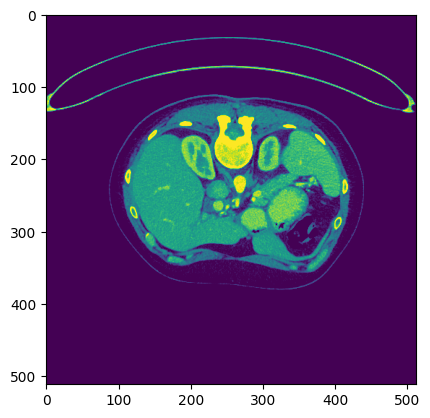

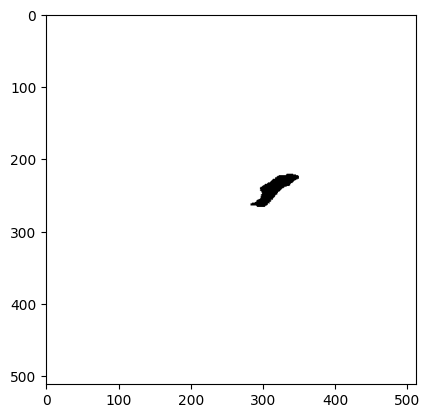

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

def display_2d_npy(npy_file, mask = False,  save_path=None):
    # type = image or mask
    # Load the 2D numpy array from the .npy file
    data = np.load(npy_file)
    # print(np.unique(data))

    # Create a figure and axis
    fig, ax = plt.subplots()

    if mask:
        # Display the mask on the axis as a binary image
        ax.imshow(data, cmap='binary')
    else:
        # Display the data on the axis
        ax.imshow(data)

    # Save the figure if save_path is specified
    if save_path is not None:
        plt.savefig(save_path)

    # Show the figure
    plt.show()

image_path = "./pancreasctKagl/images_Z/0001/0108.npy"
label_path = "./pancreasctKagl/labels_Z/0001/0108.npy"

# visualize sliced 2D image from the 3d image of person 0001 with mask
display_2d_npy(image_path, mask = False, save_path="./image.png")
display_2d_npy(label_path, mask = True, save_path="./mask.png")

# 2. Train model on preprocessed and sliced dataset 

In [ ]:
!sh pipeline

data_path:  ./pancreasctKagl
--------------------------------------------------
loading model  Mathitísunet_fd0_Z_ep15.csv
--------------------------------------------------
testing case:  01
Current DSC 0.8358544035920651
Current DSC Morph 0.7374839586608044
testing case:  02
Current DSC 0.8119103350836128
Current DSC Morph 0.7606728462759591
testing case:  03
Current DSC 0.8463534138868012
Current DSC Morph 0.8375680503932741
testing case:  04
Current DSC 0.7903586909922355
Current DSC Morph 0.7645366160971208
testing case:  05
Current DSC 0.8764835381077125
Current DSC Morph 0.7459882099342506
testing case:  06
Current DSC 0.8968718156311506
Current DSC Morph 0.7914504907547587
testing case:  07
Current DSC 0.8847452058859374
Current DSC Morph 0.7777192057634862
testing case:  08
Current DSC 0.9036535201396628
Current DSC Morph 0.8199430770315451
testing case:  09
Current DSC 0.7832854184895139
Current DSC Morph 0.7204845244103726
testing case:  10
Current DSC 0.8967660597531298
Cur

In [ ]:
!sh pipeline

data_path:  ./pancreasctKagl
--------------------------------------------------
loading model  Mathitísunet_fd0_Z_ep15.csv
--------------------------------------------------
testing case:  01
Current DSC 0.8358544035920651
Current DSC Morph 0.8359103720927364
testing case:  02
Current DSC 0.8119103350836128
Current DSC Morph 0.8131076488091459
testing case:  03
Current DSC 0.8463534138868012
Current DSC Morph 0.8475056319765883
testing case:  04
Current DSC 0.7903586909922355
Current DSC Morph 0.7921497683852753
testing case:  05
Current DSC 0.8764835381077125
Current DSC Morph 0.8768660181911619
testing case:  06
Current DSC 0.8968718156311506
Current DSC Morph 0.897996944253655
testing case:  07
Current DSC 0.8847452058859374
Current DSC Morph 0.8850840906549967
testing case:  08
Current DSC 0.9036535201396628
Current DSC Morph 0.904346173941956
testing case:  09
Current DSC 0.7832854184895139
Current DSC Morph 0.7838845460012026
testing case:  10
Current DSC 0.8967660597531298
Curre

# Visualization of prediction

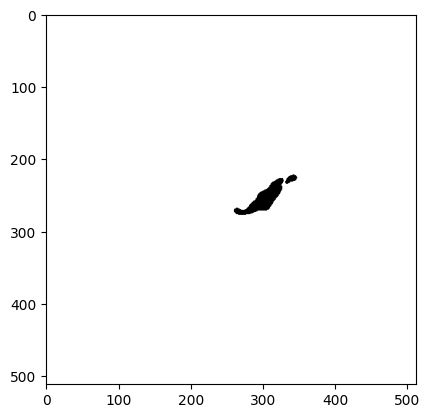

In [ ]:
# visualize predicted mask for slice 120 from person 01
image_path = "./pancreasctKagl/test-records/pred-0/01.npy"
data = np.load(image_path)
data = data[120]
mask = True
# Create a figure and axis
fig, ax = plt.subplots()

if mask:
    # Display the mask on the axis as a binary image
    ax.imshow(data, cmap='binary')
else:
    # Display the data on the axis
    ax.imshow(data)

# Show the figure
plt.show()